## Imports , Build Model 

In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):
    
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [4]:
torch.manual_seed(32)
model = Model()

## Dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [7]:
df = pd.read_csv('../Data/Iris.csv')

In [8]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Plot Dataset

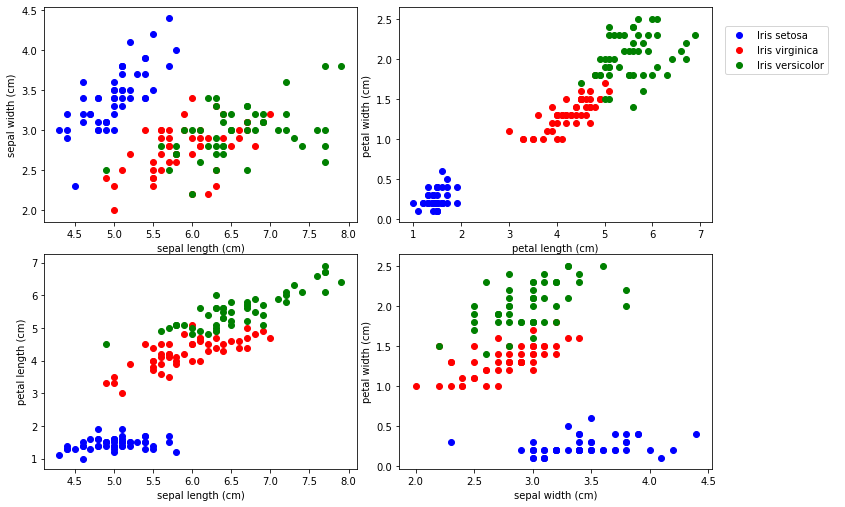

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

## Set X and y values as numpy arrays

In [ ]:
X = df.drop('target',axis=1)
y = df['target']

In [13]:
X = X.values
y = y.values

In [16]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [23]:
# Convert to Float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

## Cross Entropy Loss 

In [26]:
# Criterion = how far is our pred from actual values.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)
model.parameters()
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

## Epochs , calculate loss , Back propogation

In [44]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    
    loss = criterion(y_pred,y_train)   # we need not one hot encode y_pred becase Cross entropy loss will tc of that.
    losses.append(loss)
    
    # Print every 10 epochs
    if i%10 == 0:
        print(f'Epochs {i} and Loss {loss}')
    
    
    #Back Propogation 
    # find where gradient is 0
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epochs 0 and Loss 0.041493017226457596
Epochs 10 and Loss 0.04147452488541603
Epochs 20 and Loss 0.041456203907728195
Epochs 30 and Loss 0.04143965244293213
Epochs 40 and Loss 0.041424985975027084
Epochs 50 and Loss 0.04141179844737053
Epochs 60 and Loss 0.041399888694286346
Epochs 70 and Loss 0.0413890965282917
Epochs 80 and Loss 0.041379354894161224
Epochs 90 and Loss 0.04137057065963745


## Plot Epochs vs Loss to see if the Epochs we trained are good enough

Text(0.5, 0, 'Epochs')

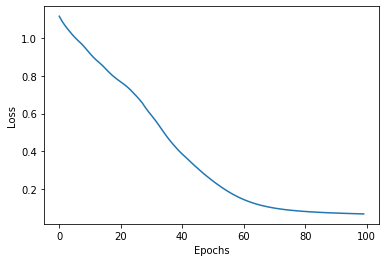

In [36]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

# Epochs 100


Text(0.5, 0, 'Epochs')

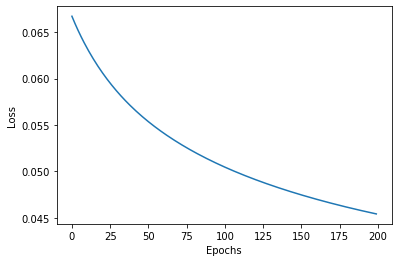

In [38]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')
# Epochs 200 

Text(0.5, 0, 'Epochs')

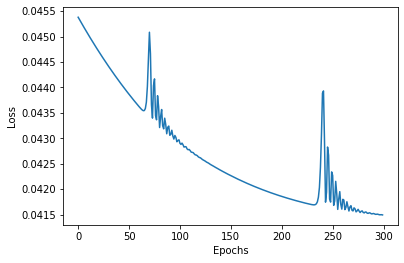

In [40]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

# Epochs 300

## Evaluate in Test Dataset

In [45]:
with torch.no_grad(): # no need of weight update during validation
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)
    
    

In [43]:
loss

tensor(0.0470)

## Save Model 

In [47]:
torch.save(model.state_dict(),'Iris_model.pt') # state_dict = has w and B after training was done.

In [ ]:
# save entire model then do
# torch.save(model,'Iris_model.pt')